In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [26]:
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.svm import SVC

import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score as cross

In [4]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [5]:
# 1. Name don't matter

# 2. sex --> number

# 3. sib

# 4. parent child 

# 3. and 4. there is difference between 0 and 1~2 and 3~...

# 5. Pclass

# 6. Age

# 7. Fare also matters = how to distribute?

In [6]:
train = train.drop(columns = 'Name')
test = test.drop(columns = 'Name')

In [7]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


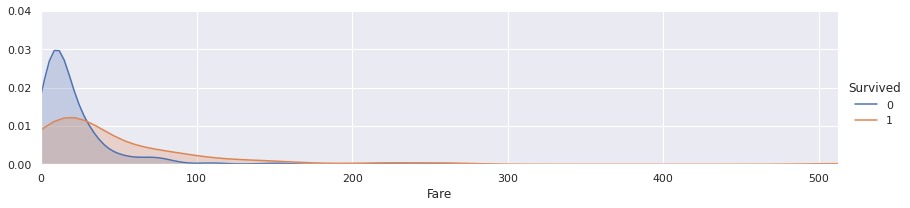

In [8]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim=(0, train['Fare'].max()), ylim=(0, 0.04))
facet.add_legend()

plt.show()

In [9]:
sex_mapping = {"male":0, "female":1}

train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

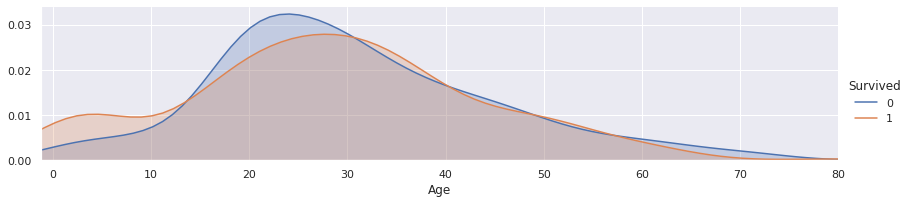

In [10]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(-1.2, train['Age'].max()))
facet.add_legend()

plt.show()

In [11]:
train['Age'] = train['Age']/80
train['Age'].fillna(-1, inplace = True)

In [12]:
train.loc[train['Age'] == -1]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,0,-1.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,0,-1.0,0,0,244373,13.0000,NaN,S
19,20,1,3,1,-1.0,0,0,2649,7.2250,NaN,C
26,27,0,3,0,-1.0,0,0,2631,7.2250,NaN,C
28,29,1,3,1,-1.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,0,-1.0,0,0,2629,7.2292,NaN,C
863,864,0,3,1,-1.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,0,-1.0,0,0,345777,9.5000,NaN,S
878,879,0,3,0,-1.0,0,0,349217,7.8958,NaN,S


In [13]:
test['Age'] = test['Age']/80
test['Age'].fillna(-1, inplace = True)

In [14]:
train = train.drop(columns = ['Embarked', 'Cabin'])
test = test.drop(columns = ['Embarked', 'Cabin'])

In [15]:
train = train.drop(columns = ['Ticket'])
test = test.drop(columns = ['Ticket'])

In [16]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,0.2750,1,0,7.2500
1,2,1,1,1,0.4750,1,0,71.2833
2,3,1,3,1,0.3250,0,0,7.9250
3,4,1,1,1,0.4375,1,0,53.1000
4,5,0,3,0,0.4375,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,0,0.3375,0,0,13.0000
887,888,1,1,1,0.2375,0,0,30.0000
888,889,0,3,1,-1.0000,1,2,23.4500
889,890,1,1,0,0.3250,0,0,30.0000


In [17]:
test['Fare'].fillna(0, inplace = True)

In [18]:
train['Fare'] = train['Fare']/513
test['Fare'] = test['Fare']/513

In [19]:
train.loc[train['Parch'] == 0, 'Parch'] = 2
train.loc[train['Parch'] == 1, 'Parch'] = 0
train.loc[train['Parch'] == 2, 'Parch'] = 0
train.loc[(train['Parch'] > 2) & (train['Parch'] < 4), 'Parch'] = 1
train.loc[train['Parch'] >= 4, 'Parch'] = 3

In [20]:
test.loc[test['Parch'] == 0, 'Parch'] = 2
test.loc[test['Parch'] == 1, 'Parch'] = 0
test.loc[test['Parch'] == 2, 'Parch'] = 0
test.loc[(test['Parch'] > 2) & (test['Parch'] < 4), 'Parch'] = 1
test.loc[test['Parch'] >= 4, 'Parch'] = 3

In [21]:
train.loc[train['SibSp'] == 0, 'SibSp'] = 2
train.loc[train['SibSp'] == 1, 'SibSp'] = 0
train.loc[train['SibSp'] == 2, 'SibSp'] = 0
train.loc[(train['SibSp'] > 2) & (train['SibSp'] < 4), 'SibSp'] = 1
train.loc[train['SibSp'] >= 4, 'SibSp'] = 3

test.loc[test['SibSp'] == 0, 'SibSp'] = 2
test.loc[test['SibSp'] == 1, 'SibSp'] = 0
test.loc[test['SibSp'] == 2, 'SibSp'] = 0
test.loc[(test['SibSp'] > 2) & (test['SibSp'] < 4), 'SibSp'] = 1
test.loc[test['SibSp'] >= 4, 'SibSp'] = 3

In [22]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,0.2750,0,0,0.014133
1,2,1,1,1,0.4750,0,0,0.138954
2,3,1,3,1,0.3250,0,0,0.015448
3,4,1,1,1,0.4375,0,0,0.103509
4,5,0,3,0,0.4375,0,0,0.015692
...,...,...,...,...,...,...,...,...
886,887,0,2,0,0.3375,0,0,0.025341
887,888,1,1,1,0.2375,0,0,0.058480
888,889,0,3,1,-1.0000,0,0,0.045712
889,890,1,1,0,0.3250,0,0,0.058480


In [29]:
train = train.drop(columns = ['PassengerId'])

In [30]:
train_data = train.drop(columns=['Survived'])
target = train['Survived']

In [32]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [126]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [162]:
clf = KNC(n_neighbors = 4)
scoring = 'accuracy'
score = cross(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.82122905 0.82022472 0.87078652 0.81460674 0.79775281]


In [163]:
round(np.mean(score)*100, 2)

82.49

In [84]:
clf = DTC()
scoring = 'accuracy'
score = cross(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.77777778 0.75555556 0.8        0.68888889 0.8        0.82222222
 0.8        0.71111111 0.68888889 0.8        0.84444444 0.77272727
 0.84090909 0.72727273 0.77272727 0.77272727 0.70454545 0.81818182
 0.72727273 0.81818182]


In [85]:
round(np.mean(score)*100, 2)

77.22

In [86]:
clf = RFC()
scoring = 'accuracy'
score = cross(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.82222222 0.82222222 0.86666667 0.82222222 0.86666667 0.84444444
 0.84444444 0.73333333 0.82222222 0.86666667 0.82222222 0.81818182
 0.86363636 0.77272727 0.77272727 0.75       0.77272727 0.84090909
 0.75       0.86363636]


In [87]:
round(np.mean(score)*100, 2)

81.69

In [88]:
clf = NB()
scoring = 'accuracy'
score = cross(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.88888889 0.71111111 0.73333333 0.75555556 0.75555556 0.77777778
 0.73333333 0.73333333 0.8        0.62222222 0.8        0.72727273
 0.75       0.70454545 0.81818182 0.81818182 0.81818182 0.88636364
 0.81818182 0.77272727]


In [89]:
round(np.mean(score)*100, 2)

77.12

In [90]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.84444444 0.77777778 0.77777778 0.77777778 0.82222222
 0.77777778 0.8        0.8        0.8        0.84444444 0.72727273
 0.81818182 0.77272727 0.77272727 0.84090909 0.81818182 0.84090909
 0.79545455 0.81818182]


In [91]:
round(np.mean(score)*100, 2)

80.24

In [92]:
test_data = test.drop(columns = "PassengerId").copy()

In [206]:
clf = RFC()
clf.fit(train_data, target)

prediction1 = clf.predict(test_data)

In [207]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})

submission

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [95]:
submission.to_csv('submission.csv', index = False)
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [208]:
clf = KNC(n_neighbors = 4)
clf.fit(train_data, target)

prediction2 = clf.predict(test_data)

In [173]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})

submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [174]:
submission.to_csv('submission.csv', index = False)
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [209]:
clf = SVC()
clf.fit(train_data, target)

prediction3 = clf.predict(test_data)

In [195]:
prediction = prediction1 + prediction2 + prediction3

In [196]:
prediction = prediction/3

In [200]:
prediction = prediction1 + prediction2 + prediction3
prediction = prediction/3
for i in range(len(prediction)):
    if prediction[i] < 0.5:
        prediction[i] = 0
    else:
        prediction[i] = 1
        
prediction

array([0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [201]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})

submission

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [202]:
submission.to_csv('submission.csv', index = False)
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,1.0


In [210]:
prediction1

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [211]:
prediction2

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [212]:
prediction3

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [223]:
prediction = prediction1 + prediction2 + prediction3
prediction = prediction/3
for i in range(len(prediction)):
    if prediction[i] < 0.5:
        prediction[i] = int(0)
    elif prediction[i] >= 0.5 :
        prediction[i] = int(1)
        
prediction= prediction.astype(int)

In [224]:
prediction

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [227]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})

submission



,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [228]:
submission.to_csv('submission.csv', index = False)
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
